**Brownian Motion and Monte-Carlo Simulation**

**Standard Brownian Motion**

Brownian motion refers to a phenomenon in which particles in a fluid appear to jump around when observed under a microscope. This was first described by the biologist Robert Brown in 1827.

Brownian function was first treated mathematically by Albert Einstein in 1905 who used a model from statistical physics to explain the phenomenon.  Norbert Weiner is credited with developing a mathematical model for Brownian motion that has now been heavily studied and is often referred to as a *Weiner* process. 

The standard Brownian motion (starting at 0) refers to a random function $X: [0,+\infty) \rightarrow\mathbb{R}$ whose distribution has the following properties. Below, we use $X_t$ to denote $X(t)$.

1) (Starting value) $X_0 = 0$ with probability 1.
2) (Independent increments) For every choice of $0\leq t_0 < t_1 < \cdots < t_n$ the random variables 

$$
X_{t_1}-X_{t_0},X_{t_2}-X_{t_1},\ldots,X_{t_n}-X_{t_{n-1}}
$$

are independent.

3) (Normality) $X_t - X_s \sim N(0,t-s)$ for all $0\leq s < t < \infty.$
4) (Continuity) With probability 1, the sample path $t \rightarrow X_t$ is a continuous function. 

If we think of $X_t$ as the position of a particle at time $t$ then the things we are calling *increments* $X_t - X_s$ gives the *signed* distance travelled between times $s$ and $t.$ 

Standard Brownian motion forms the basis for many stochastic processes through stochastic differential equations.

In 1951, a mathematician named Monroe Donsker proved a theorem (called Donsker's theorem) that says that we can obtain a random function with the above properties by considering a random walk on an infinitesimal lattice.

**Random walk**

Consider the usual random walk on $\mathbb{R}$ in which we start at position 0 at time 0. In every subsequent unit time step we move either one unit to the right or left each with probability $\frac{1}{2}$ and each move is independent of all of the others.

We can plot our position as function of time with linear interpolation. The following video shows 5 realizations of the resulting random function for 100 steps.

In [ ]:
%%HTML
<video width=600 controls>
  <source src="RandomWalkrealizations.mp4" type="video/mp4">
</video>


**Rescaling**

So suppose instead of using 1 unit of time, we make the time increment between jumps very small, say some small number $\Delta>0.$ 

Our realizations would look very wild. However, if we take the jump sizes equal to $\pm\sqrt{\Delta}$ something quite extraordinary happens. 

Donsker's observed we get standard Brownian motion in the limit as $\Delta \rightarrow 0.$

Consequently, we can think of Brownian motion as the result of an random walk on an infinitesimal grid. 


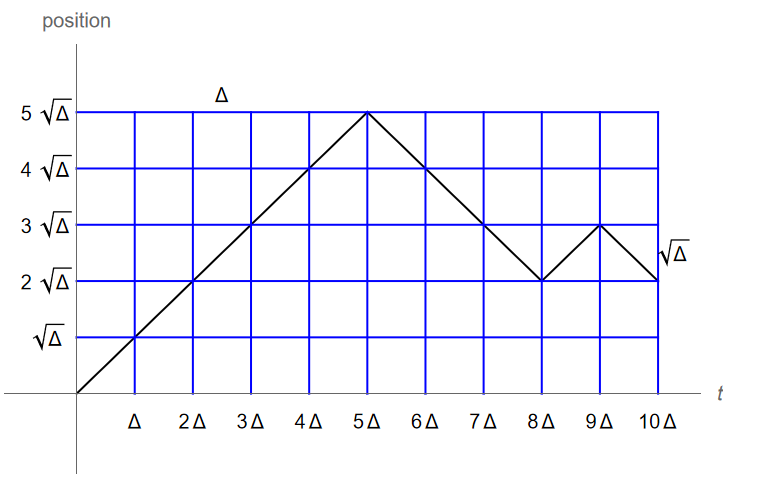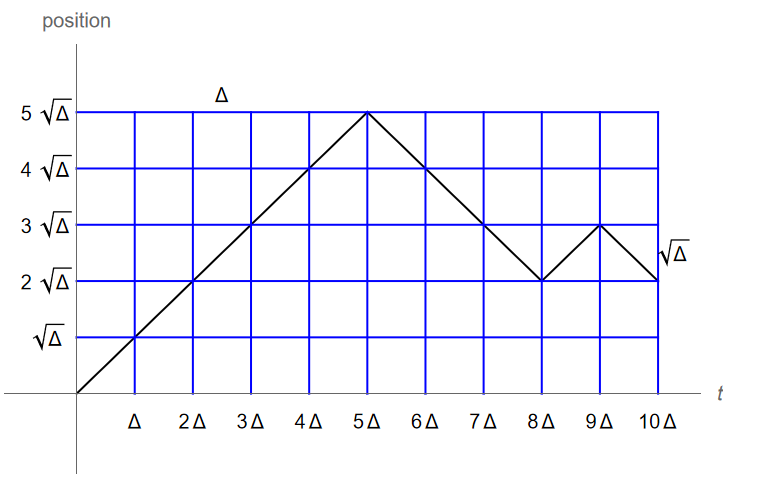

This provides us with a method for approximating Brownian motion realizations.

**Standard Brownian motion (BM) realization**

Here we create an approximate realization of standard Brownian motion on an interval [0,T] starting at 0.

As above we think of the $x$-axis as a *time* axis and the $y$-axis as a *position* axis, as we can think of the function as describing the position of a particle moving around as time progresses.

Importantly - these realizations are *random*.

Each will be a piecewise linear function on the $[0,T].$

This is only an approximation since, strictly speaking, we need to let $N \rightarrow \infty$ to get this to work in any exact sense.

So the situation is somewhat analogous to approximating 

- the derivative of a differentiable function $f$ at a point $x$ using a difference quotient
$$
{f(x+\delta)-f(x) \over \delta}
$$
for some fixed (small) value of $\delta$

- the integral of a continuous function $f$ in an interval $[a,b]$ using the trapezoid rule  
$$
\delta {f(a) + 2f(a+\delta) + \ldots + 2f(b-\delta)+f(b) \over 2}
$$
where $\delta = (b-a)/N$ for some large integer of $N.$

Our realization starts at 0 and makes *jumps/increments* with mean 0 and variance $\sqrt{\Delta}$ in every time interval of length $\Delta =T/N$.

One way to do this is to take increments to be $N(0,\Delta).$

Alternatively, we could take our increments to be $\pm \sqrt{\Delta}$ each with probability $\frac{1}{2}.$

We create a sequence of increments:

>  $\delta_1,\delta_2,\ldots,\delta_{N}$

then compute the cumulative sums (including the starting value of 0)

 > $$0,\delta_1,\delta_1+\delta_2,\delta_1+\delta_2+\delta_3,\ldots,\delta_1+\delta_2+\delta_3+\cdots+\delta_N.$$

So that the graph of the resulting random function passes throught the points:

>  $$(0,0)$$
> $$(\Delta,\delta_1)$$
> $$(2\Delta,\delta_1+\delta_2)$$
> $$\vdots$$
> $$(T=N\Delta,\delta_1+\delta_2+\delta_3+\cdots+\delta_N)$$

and the rest of the graph is obtained using linear interpolation.

We won't actually do linear interpolation - we will simply generate an array of time points and an array position points.

**Code**

Here is code for generating the time and position arrays for a single realization.

In [ ]:
import numpy as np

T=1                                # doing BM on [0,1]
N=1000
dt=T/N                             # the length of a time interval
sqrtdt = np.sqrt(dt)
dB=np.random.normal(size=N)*sqrtdt # the increments
B=np.cumsum(dB)
B=np.insert(B,0,0)                 # insert 0 at beginning of B
T=np.linspace(0,T,N+1)             # time discrete time points

**Plotting Curves in Matplotlib**

We want to plot the sample path for a single realization. Matplotlib can be used to produce plots. A single line plot is easy to produce. We just pass to the plot function a pair of arrays of the same length.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(T,B)
plt.show()

**Distribution-free property**

Any choice of distribution for the increments that are mean 0 and variance $\Delta$ produces random functions with the same limiting distribution as $\Delta \rightarrow 0.$

So we could have used increments that are $\pm \sqrt{\Delta}$ each with probability $1/2.$ 

In [ ]:
import numpy as np

T=1
N=1000
dt=T/N
sqrtdt = np.sqrt(dt)
dB=np.random.choice([-1,1],size=N)*sqrtdt
B=np.cumsum(dB)
B=np.insert(B,0,0) # insert 0 at begginning of B
T=np.linspace(0,1,N+1)
plt.plot(T,B)
plt.show()

**Continuity**

One key property of these curves is the behavior as we let $\Delta$ go to zero. 

The curves end up being continuous with probability 1.

Trying different *normalizations* reveals that something interesting is happening (try this at home).

**Realization function**

Let's define a function that gives a realization of Brownian Motion in $[0,T]$ starting at 0.

Inputs:

- **T** = a positive real number
- **N** = a positive integer

Outputs:

- **Tvec** = a 1-d array of equispaced time values 
- **Bvec** = a 1-d array of Brownian motion positions 

In [ ]:
def BrownianMotionRealization(T,N):
    dt=T/N
    sqrtdt = np.sqrt(dt)
    dB=np.random.normal(size=N)*sqrtdt
    Bvec=np.cumsum(dB)
    Bvec=np.insert(Bvec,0,0)
    Tvec=np.linspace(0,T,N+1)
    return Tvec,Bvec

**Plot Options**

In [ ]:
import matplotlib.pyplot as plt

Tvec,Bvec=BrownianMotionRealization(1,1000)

plt.plot(Tvec,Bvec,color='blue',linewidth=.25)
plt.xlabel('t')
plt.ylabel("B(t)")
plt.title("One Realization of Standard Brownian Motion")
plt.show()

**Superimposing plots**

We can plot multiple curves on the same plot, in particular multiple realizations of standard Brownian motion.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

T=1
N=1000

Tvec,Bvec1=BrownianMotionRealization(1,1000)
Tvec,Bvec2=BrownianMotionRealization(1,1000)
Tvec,Bvec3=BrownianMotionRealization(1,1000)
Tvec,Bvec4=BrownianMotionRealization(1,1000)

plt.plot(Tvec,Bvec1,color='green',linewidth=.5)
plt.plot(Tvec,Bvec2,color='red',linewidth=.5)
plt.plot(Tvec,Bvec3,color='blue',linewidth=.5)
plt.plot(Tvec,Bvec4,color='magenta',linewidth=.5)

plt.xlabel("t")
plt.ylabel("B(t)")
plt.title("Multiple Realizations of Standard Brownian Motion")
#plt.savefig("test.png")
#plt.savefig("test.pdf")
plt.show()

**Problem**

If $X_t,t\in [0,1]$ is standard Brownian motion (starting at 0), what is the probability that 

- $.6 \leq  X_t < 1.3$ for all $t \in [.4,.45]$


We can very easily get an approximate answer by generating many realizations and computing the proportion of realizations that satisfy these conditions.

We already wrote code for generating realizations of standard Brownian motion in an interval.  We just need a function that takes as input a realization and outputs 0 if the above doesn't happen and 1 if the above does happen for our realization.

In [ ]:
def check_event(Tvec,Bvec):
    N=len(Tvec)
    for i in range(N):
        t=Tvec[i]
        B=Bvec[i]
        if (t>=.4 and t<=.45) and (B<.6 or B>1.3):
            return False
    return True

In [ ]:
ntrials=10000
counter=0
for trial in range(ntrials):
    Tvec,Bvec=BrownianMotionRealization(1.,1000)
    counter+=check_event(Tvec,Bvec)
pest=round(counter/ntrials,4)
sd=round(np.sqrt(pest*(1-pest)),4)
se=round(sd/np.sqrt(ntrials),4)
CIhalfwidth=round(1.96*se,4)
print("prob estimate = "+str(pest))
print("sd estimate = "+str(sd))
print("se estimate = "+str(se))
print("95% CI = "+str(pest)+" +/- "+str(CIhalfwidth)) 